# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [16]:
tips = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv')
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

In [17]:
del tips['Unnamed: 0']
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

展示 `total_bill`（账单金额）这一变量的单变量分布情况，观察消费金额的集中区间。

*   `kde=True`:在直方图的基础上叠加核密度估计曲线，用于平滑地展示概率密度。

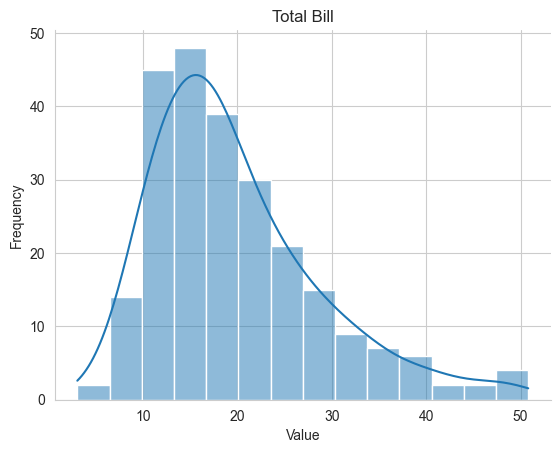

In [18]:
ttbill = sns.histplot(tips.total_bill, kde=True);

ttbill.set(xlabel = 'Value', ylabel = 'Frequency', title = "Total Bill")

sns.despine()
plt.show()

*数据呈现明显的右偏分布，高峰出现在10-20。绝大多数顾客的消费属于中低档水平（< $30），超过 40 美元的大额消费虽然存在，但频次极低，构成了分布的长尾。*

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

创建散点图展示 total_bill 与 tip 的关系，分析“账单金额”与“小费”之间的相关性，并拟合趋势线。

使用 `sns.jointplot()` 创建联合分布图。
*   `kind='reg'`：添加线性回归拟合线以及置信区间（阴影部分），并在边缘添加带有密度曲线的直方图。

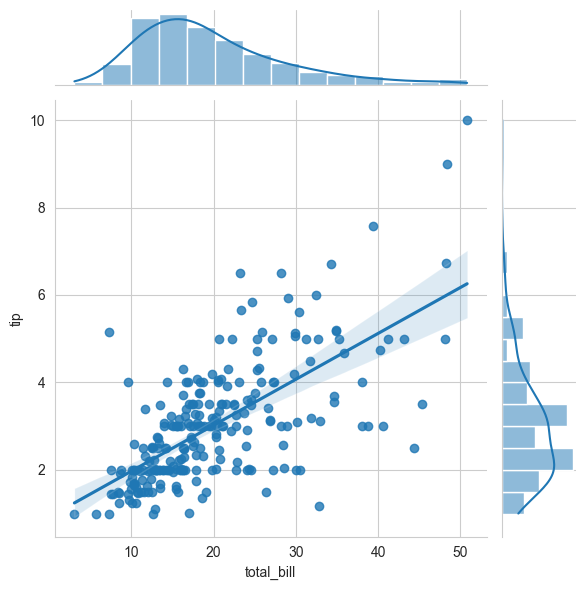

In [19]:
sns.jointplot(x ="total_bill", y ="tip", data = tips, kind='reg');

plt.show()

*回归线呈显著上升趋势，说明 `total_bill` 与 `tip` 存在强正相关，即消费越高，小费越多。回归线周围的阴影区域较窄，说明这种线性关系比较稳定。但在高消费区间（>40美元），点变得稀疏且离散，预测的不确定性增加。顶部和右侧的直方图印证两个变量均符合右偏分布的特征。*

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

创建矩阵图展示 total_bill, tip 和 size 的关系，宏观概览数据集中所有数值变量之间的两两关系及自身分布。

使用 `sns.pairplot()`
*   `data=tips`：传入整个数据集，函数会自动筛选出数值类型的列（total_bill, tip, size）进行两两配对绘图。

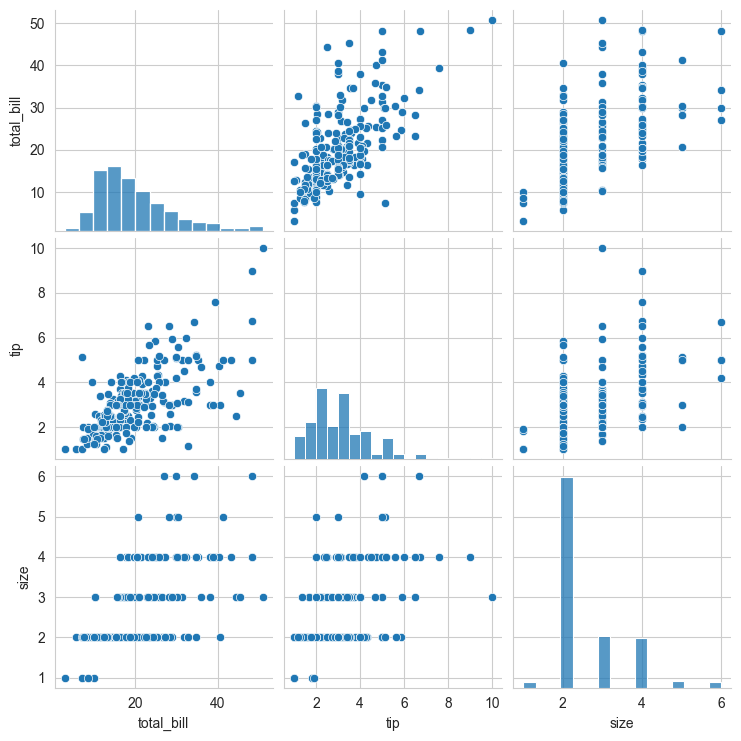

In [22]:
sns.pairplot(tips);

plt.show()

*观察自身分布（对角线）,`total_bill` 和 `tip` 都呈现明显的右偏分布，说明小额消费占主导；而 `size` 显示大部分顾客是 2 人就餐。<br>观察变量关系（非对角线）,最明显的是 `total_bill` 和 `tip` 呈现强正相关的线性关系。同时，随着用餐人数 `size` 的增加，消费金额也有上升趋势，但由于 `size` 是离散变量，在散点图中表现为分层的带状分布。*

### Step 8. Present the relationship between days and total_bill value

使用抖动散点图展示 Days 和 total_bill 之间的关系对比不同星期的账单金额分布差异。

使用 `sns.stripplot()`
*   `x="day", y="total_bill"`：X轴为分类变量，Y轴为数值变量。
*   `jitter=True`即“抖动”，让重叠的数据点在水平方向随机散开。如果不加此参数，相同金额的点会重叠成一条线，无法观察数据密度。

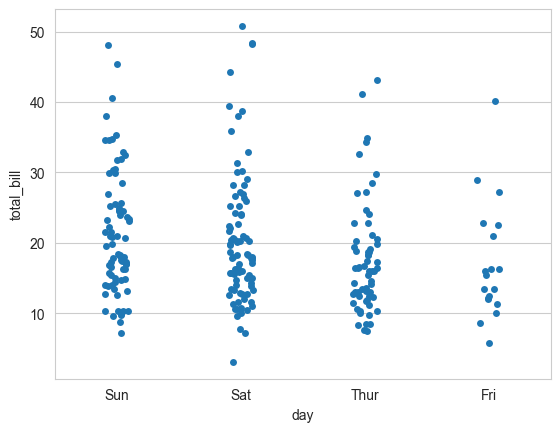

In [23]:
sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True);

plt.show()

*通过分类散点图观察不同日期的消费习惯。观察极值，周六（Sat）和周日（Sun）出现了最高的账单金额（接近 $50），说明周末更容易发生大额聚餐消费。<br>
对比密度，周四（Thur）和周五（Fri）的数据点主要集中在 10-20 美元区间，且周五的数据量明显最少，可能是样本量差异所致。"*

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

创建散点图：Y轴为Day，X轴为Tip，按性别区分。在横向散点图的基础上，增加“性别”维度，观察不同性别在不同日期的给小费情况。

使用 `sns.stripplot()`
*   `x="tip", y="day"`：交换XY轴，变成了水平条形布局，适合分类标签较多的情况。
*   `hue="sex"`：维度增加。利用颜色区分不同性别。
*   `jitter=True`：防止点重叠。

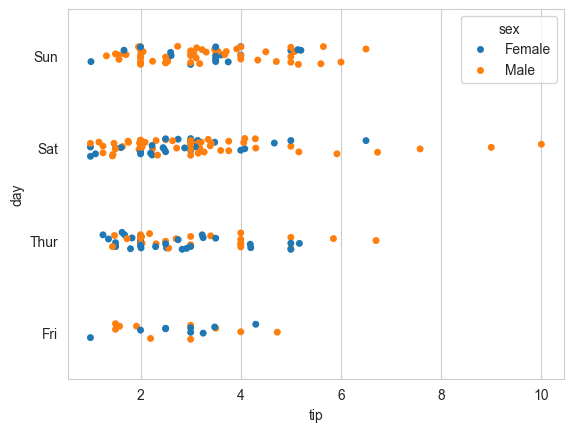

In [24]:
sns.stripplot(x = "tip", y = "day", hue = "sex", data = tips, jitter = True);

plt.show()

*周六（Sat）出现的几个极高小费（> $9）均来自男性顾客（橙色点）。大部分小费集中在 2-4 美元之间。*

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

创建箱线图展示不同时间段（午/晚）每天的账单分布。利用箱线图对比不同日期、不同餐次的消费中位数及离散程度。

使用 `sns.boxplot()`。
*   `hue="time"`为嵌套分组。在每天（Day）的基础上，再拆分为午餐和晚餐进行对比。
*   `data=tips`数据源。

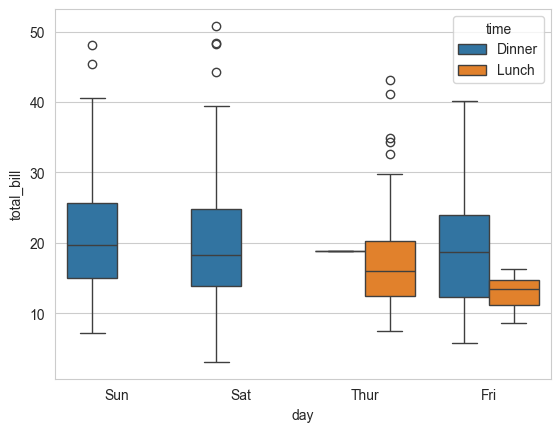

In [25]:
sns.boxplot(x = "day", y = "total_bill", hue = "time", data = tips);

plt.show()

*通过箱线图的统计特征分析周四（Thur）主要是午餐消费（蓝色箱体），而周末（Sat/Sun）几乎全是晚餐消费（无午餐数据），这反映了餐厅的营业规律。周末晚餐的中位数（箱体中间线）明显高于周四午餐。周日晚餐的分布范围（箱体高度）最大，说明顾客消费能力的差异性在周日最大。上方的圆点代表存在显著偏离正常范围的高额消费。*

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

创建两个并排的直方图对比 Lunch 和 Dinner 的小费分布。使用网格分面对比午餐和晚餐的小费频率分布。

使用 `sns.FacetGrid()`和`.map()`
*   `sns.FacetGrid(tips, col="time")`：创建一个绘图网格，按 `time` 列的唯一值（Dinner/Lunch）分成两列（col）。
*   `g.map(plt.hist, "tip")`：在每个网格中映射 `plt.hist` 函数，绘制 `tip` 列的直方图。

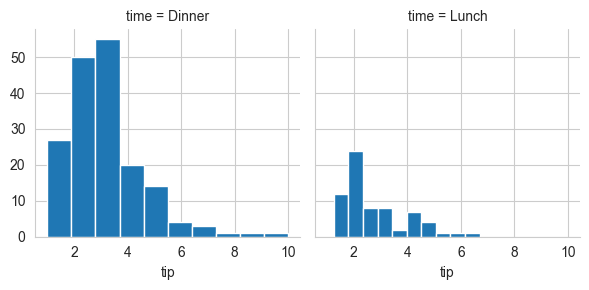

In [28]:
g = sns.FacetGrid(tips, col = "time")
g.map(plt.hist, "tip");

plt.show()

*通过分面直方图对比，Dinner（左图）的柱子高度远高于 Lunch（右图），直观展示了晚餐时段的交易量远大于午餐。尽管数量级不同，但两者的分布形态相似，均呈右偏分布。晚餐时段的小费延伸到了 10 美元附近，而午餐时段的小费基本都在 6 美元以内，或许与晚餐通常账单金额更高有关。*

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

创建两个散点图，按性别分面，按吸烟习惯着色，展示 Bill vs Tip，在一张图中展示四个维度：账单（X）、小费（Y）、性别（分面）、吸烟习惯（颜色）。

使用 `sns.FacetGrid()`和`.map()`。
*   `col="sex"`：按性别将画布分为左右两栏（Female/Male）。
*   `hue="smoker"`：按吸烟习惯对点进行着色（Yes/No）。

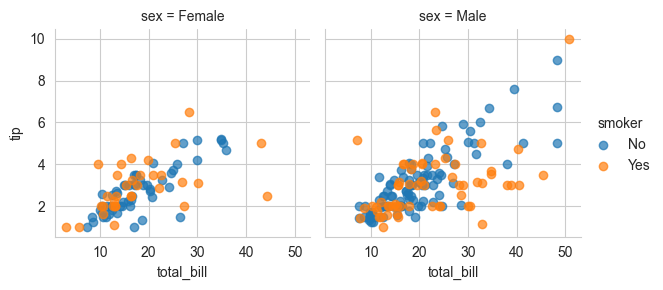

In [32]:
g = sns.FacetGrid(tips, col = "sex", hue = "smoker")
g.map(plt.scatter, "total_bill", "tip", alpha =.7)

g.add_legend();

plt.show()

*通过多维分面散点图，右图（Male）的数据点明显比左图（Female）更分散，且包含更多高消费和高小费的离群点，显示男性顾客的消费方差更大。在两个性别中，吸烟者和非吸烟者没有表现出明显的聚类分离，说明吸烟习惯对“小费-账单”这一线性关系的影响并不显著。无论性别或吸烟与否，账单与小费的正相关趋势保持一致。*

### BONUS: Create your own question and answer it using a graph.

### Mean Girls vs. Mean Guys: Who actually tips better

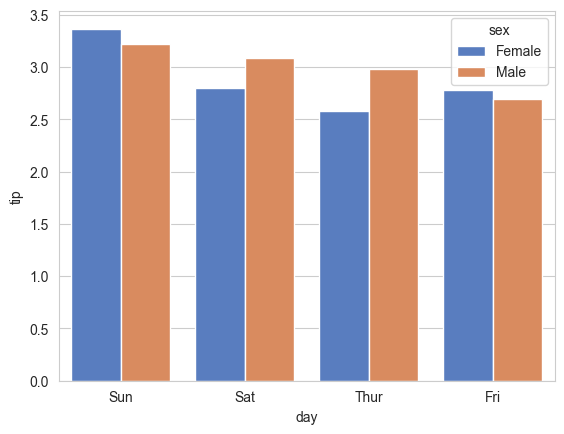

In [42]:
# tips.groupby(['day', 'sex'])['tip'].mean().unstack().plot(kind='bar', figsize=(10, 6), rot=0)
# plt.show()

sns.barplot(x="day", y="tip", hue="sex", data=tips, errorbar=None, palette="muted");

plt.show()

*性别慷慨度并没有绝对的赢家，而是呈现出一种交替领先的态势<br>服务员想多拿小费，周日请重点关注女性顾客，周四请重点关注男性顾客。*